# <div align="center"><b> Сборный проект - выявление определяющих успешности игры закономерностей </b></div> 

**Описание проекта**

В проекте зайдествован магазин "Стримчик". Из открытых источников представлены исторические данные: о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. 

***

**Цель проекта** 

Выявление определяющих успешности игры закономерностей. Что позволит сделать прогноз на развитие продуктов в следующем году. 

***

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<blockquote>Весь проект поделен на 6 шагов:<ol>
    
<li>Изучение общей информации</li> 
<li>Подгатовка данных</li>
<li>Исследовательский анализ данных</li>
<li>Составление портрета пользователя каждого региона</li>
<li>Проверка гипотезы</li>
<li>Общий вывод</li>    
</ol>
</blockquote> 

---

# Шаг 1. Изучение общей информации.

In [3]:
import pandas as pd #импортируем библиотеку пандас
import matplotlib.pyplot as plt #и графики заодно
import numpy as np #импортируем библиотеку нампи
from scipy import stats as st
import seaborn as sns

In [4]:
#прочитаем файл
try:
    data = pd.read_csv('C:\\Users\\Вениамин\\Desktop\\Аналитик Данных\\проекты\\games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [5]:
#знакомимся с данными 
print(data.shape)
data.head()

(16715, 11)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общее количество строк - `16 715`, столбцов - `11`.

In [6]:
#посмотрим на данные в полном объеме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Основные типы колонок: `float` и `object`. 

In [7]:
#пропуски в процентном соотношении
isna_in_data = pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')
isna_in_data

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


Столбец `Critic_Score` имеет больше `51%` пропусков - больше половины. `User_Score` и `Rating` имеют по `40%`.

In [67]:
# Описание величин для всех числовых типов данных: количество, среднее арифметическое, стандартное отклонение и тд.
data.describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score
count,16444.00,16444.00,16444.00,16444.00,16444.00,16444.00,16444.00,16444.00
mean,2006.49,0.26,0.15,0.08,0.05,0.54,32.98,2.69
std,5.88,0.82,0.51,0.31,0.19,1.56,36.30,4.17
min,1980.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00
25%,2003.00,0.00,0.00,0.00,0.00,0.06,-1.00,-1.00
50%,2007.00,0.08,0.02,0.00,0.01,0.17,-1.00,-1.00
75%,2010.00,0.24,0.11,0.04,0.03,0.47,70.00,7.30
max,2016.00,41.36,28.96,10.22,10.57,82.54,98.00,9.70


In [9]:
# Cмотрим описательную статистику к нечисловым столбцам (категориальному типу данных): 
# количество, уникальные, самые частые, их частота
data.describe(include=['O'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


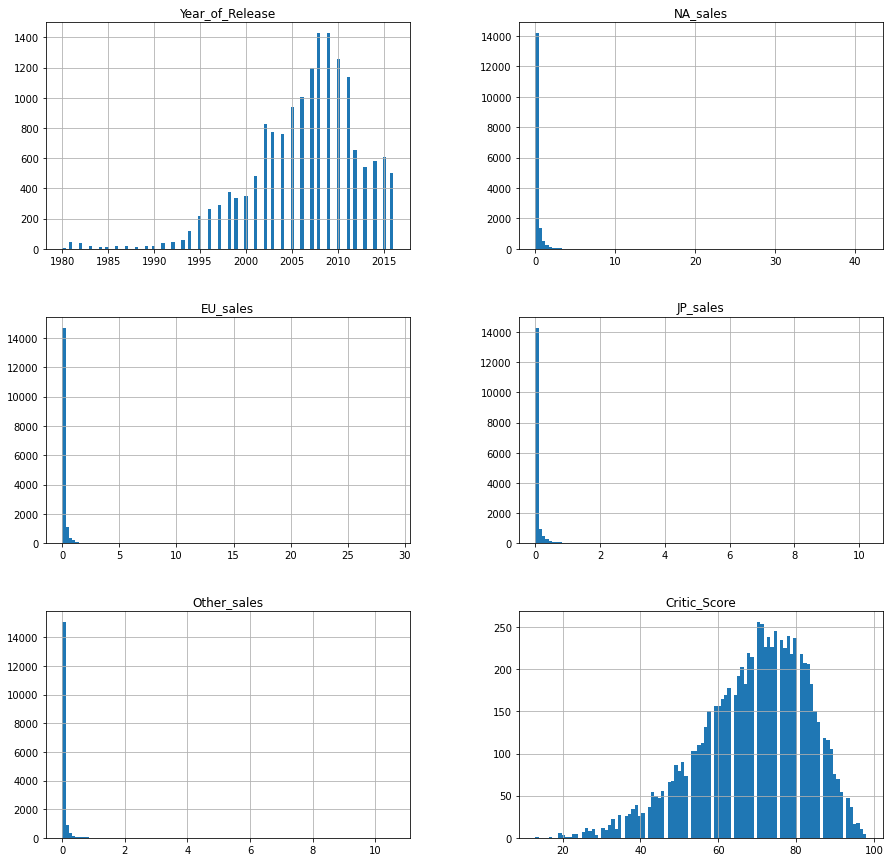

In [10]:
#Построим общую гистограмму для всех числовых столбцов таблицы.
data.hist(bins = 100, figsize= (15, 15));

**Вывод:**

Итого мы имеем `16 715` строк и 11 столбцов с типами object и float64. В 45% столбцов мы имеем пропуски, самое большее количество пропусков в `Critic_Score` - больше `50%` самое меньшее в `Year_of_Release` менее 2% еще меньше данных в столбцах 'name' и 'genre'.

---

# Шаг 2. Подготовка данных.

## Исправление названий столбцов

In [68]:
#исправляем название столбцов (проводим к нижнему регистру)
data.columns = data.columns.str.lower()
data.head(15)#проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1,-1.0,no name
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1,-1.0,no name
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,-1,-1.0,no name
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,-1,-1.0,no name


## Изменение типов столбцов

In [12]:
#Изменим типы данных в столбцах
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')

В столбце `user_score` мы столкнулись с значением TBD (11 строк) которое обозначает To Be Discussed - подлежит обсуждению. Переведем его в float и все значения TBD перейдут в Nan.

В столбце `critic_score` мы столкнулись с значением NAN, которое нам мешало перевести столбец в тип `int`, поэтому заменим его [тут](#intro) 

In [13]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

В столбце `year_of_release` мы поменяли тип на `Int64`.

In [14]:
#проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Вывод**:

В трех столбцах мы изменили тип данных, `user_score` сменили на float, `critic_score` изменили на Int, `year_of_release` изменили на Int для возможности удобства корректного анализа данных и выявления закономерности.

## Обработка пропусков

Прежде чем обрабатывать пропуски, посмотрим явные дубликаты.

In [15]:
data.duplicated().sum()#их нет 

0

In [16]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

### Начнем с столбца `name`, найдем строки с пропусками и уникальными значениями.

In [17]:
#найдем пустые значения в столбце 
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [18]:
#удалим пустые строки с пустыми значениями в name.
data = data.dropna(subset = ['name'])

В столбце name нашли два пропуска, было принято решение их удалить. Так как это строковые данные и заменить их нечем.

###  Столбец `year_of_release`, найдем строки с пропусками и уникальными значениями.

In [19]:
#найдем пустые значения в столбце 
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Всего пропущенных значений `269`

In [20]:
#удалим эти значения так как нецелосообразно будет заменять года выпуска,
data = data.dropna(subset = ['year_of_release'])

В столбце year_of_release нашли 269 пропусков, было принято решение их удалить. Предположу, что пропуски это человеческий фактор.

###  Столбец `genre`, найдем строки с пропусками и уникальными значениями.

In [21]:
#найдем пустые значения в столбце т.к. их всего 2, удалим 
data[data['genre'].isna()] #они удалились вместе с year_of_release

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


###  Столбец `user_score`, найдем строки с пропусками и уникальными значениями.

Ранее к уникальным значениям в столбце `user_score` относилось значение 'tbd', но мы его заменили на 'Nan' 

In [22]:
data['user_score'].isna().sum() #найдем количество пустых значений

8981

In [23]:
#заменим пустые значения по столбцу genre на загушку
data.loc[data['user_score'].isna(), 'user_score'] = -1

In [24]:
data['user_score'].isna().sum() #проверим

0

В связи с большим количеством пропусков `user_score - 40.1%` было принято решение заменить все пропуски на -1.

### Столбец `critic_score`, найдем строки с пропусками и уникальными значениями.

Ранее в столбце `critic_score` пустые значения были заменены на 0(так как уникальных значений со значением 0 в столбце `critic_score` не было выявлено), для возможности изменения типа столбца, заменим 0 на заглушку -1.

In [25]:
#заменим пустые значения на -1
data.loc[data['critic_score'].isna(), 'critic_score'] = -1


In [26]:
data[data['critic_score'].isna()] #проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<a id='intro'></a> Здесь мы меняем тип данных столбца `critic_score` на Int.

In [27]:
data = data.astype({'critic_score': np.int64}) 

In [28]:
data.info() #проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


Итак, что бы не потерять данные мы закрыли `51%` пропусков заглушками.

### Столбец `rating`, найдем строки с пропусками и уникальными значениями.

В столбце `rating` мы имеем 40% пропусков, удалять такой большой массив данных неразумно , на мой взгляд, поэтому переведем пустые значения в 'no name'

In [29]:
data.loc[data['rating'].isna(), 'rating'] = 'no name'

In [30]:
data[data['rating'] == 'no name'] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no name
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no name
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,no name
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,no name
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,-1.0,no name
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,no name
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,no name
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,no name
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,no name


Все пустые значения в столбце `rating` мы заменили на `no name`, потому что терять более 40% данных не очень разумно , на мой взгляд.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [31]:
#создадим новый столбец с суммой (na_sales + eu_sales ...) по регонам
data.insert(loc=8, column='amount_region', value=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1))

In [32]:
#проверим
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1,-1.0,no name
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1,-1.0,no name


**Вывод:** 

*Самое первое, что мы сделали - привели названия столбцов к нижнему регистру, захватили сразу все стоблцы.*

*Следующим шагом было изменение типов столбцов, изменению подверглись:*
- user_score - перевели из object в float (сразу перевели значения TBD в Nan)
- critic_score - перевели из float в int.
- year_of_release - поменяли тип на int.

*Третим этапом обработали пропуски, посмотрели явные и неявные дубликаты, таковых обнаружено не было. 
Прпуски были заменены:*
- name, genre, year_of_release - сумарное количество удаленных строк с пропусками менее 2% - 273 строки, принятие решение,
- user_score, critic_score - пропуски в этих столбцах мы заменили на заглушку -1,
- rating - заменили пустые значения на "no name".

*Четвертым шагом было добавление нового столбца "amount_region" суммарные продажи во всех регионах.*

---

# Шаг 3. Исследовательский анализ данных.

## Посмотрим, сколько игр выпускалось в разные годы.

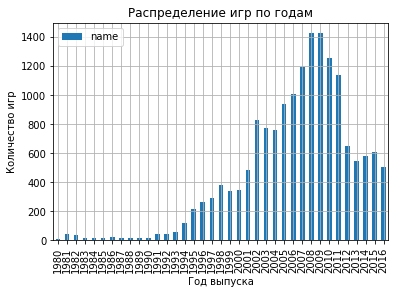

In [69]:
#построим таблицу и график
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')\
.plot(kind = 'bar',grid = True).set_title('Распределение игр по годам');

plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

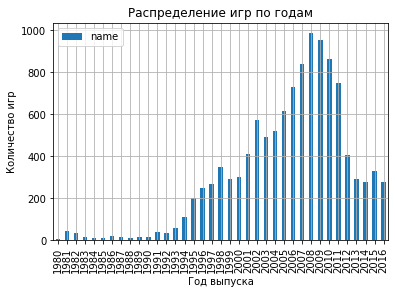

In [72]:
#посмотрим более точные результаты (сгруппируем значения по названию игр)
count_by_year = data.groupby(by = ['name']).agg({'platform': 'first', 'genre': 'first','amount_region': 'first','year_of_release': 'first'})\
.reset_index()

count_by_year.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')\
.plot(kind = 'bar',grid = True).set_title('Распределение игр по годам')

plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

По графику видно, до 2000 года игр выпускалось мало до 400 шт. в год. Расцвет игровой индустрии пришелся на 2008 (987) и 2009 (957) выпускалось более 1400 шт. в год.

## Посмотрим, как менялись продажи по платформам.

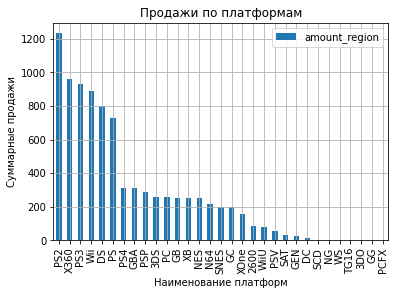

In [73]:
#построим таблицу и график
data.pivot_table(index = 'platform', values = 'amount_region', aggfunc = 'sum')\
.sort_values(by = 'amount_region', ascending = False)\
.plot(kind = 'bar',grid = True).set_title('Продажи по платформам');

plt.xlabel('Наименование платформ')
plt.ylabel('Суммарные продажи')
plt.show()

Ведущей платформой по продажам игр является PS2 более 1200 млн. После идет x360, wii, ps3 - больше 800 продаж. Менее популярные платформы WS, TG16, PCFX, SCD, NG, GG, 3DO.

## Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам.

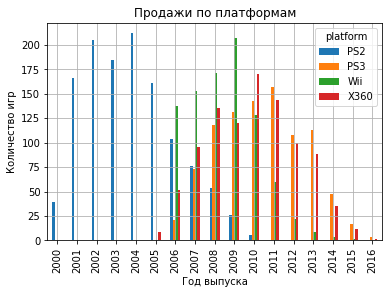

In [76]:
#сделали срез по платформам
top_platfom = data.query('platform == "PS2" or platform == "X360" or platform == "Wii" or platform == "PS3"') 
#построим график по сумарной прибыли платформ
top_platfom = top_platfom.pivot_table(index = 'year_of_release', columns = 'platform', values = 'amount_region', aggfunc = 'sum')\
.plot(kind = 'bar',grid = True).set_title('Продажи по платформам');
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Самая старшая из игровых платформ - PS2 с 2000 по 2005 игры продавали только на нее. В 2005 впервые появился конкурент X360, в 2006 на рынок вышли топ 4 игровых игровых платформ. И первые 4 года с 2006 по 2010 новая платформа Wii была в топе по продажам. После взлета Wii в 2010г борьбу начали PS3 и X360. По Графику можно судить, в среднем цикл жизни игровой платформы от 10-11 лет.

## Возьмем данные за актуальный период (актуальным период с 2013 по 2016) 

In [37]:
#сделаем срез в новой переменной
data_actual = data.loc[(data['year_of_release'] > 2014) & (data['year_of_release'] <= 2016)]
data_actual.head() #проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,-1,-1.0,no name
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82,4.3,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,-1,-1.0,no name
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85,5.0,E
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,7.39,-1,-1.0,no name


## Определим платформы, которые лидируют по продажам, растут или падают? И отметим потенциально прибыльные из них.

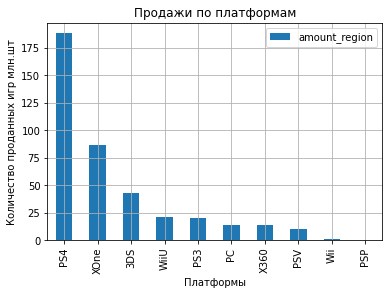

In [38]:
#создадим датафрейм и сгруппируем его по платформам
data_actual.pivot_table(index = 'platform', values = 'amount_region', aggfunc = 'sum')\
.sort_values(by = 'amount_region', ascending = False)\
.plot(kind = 'bar',grid = True).set_title('Продажи по платформам');
plt.xlabel('Платформы')
plt.ylabel('Количество проданных игр млн.шт')
plt.show()

Из актуального периода можно определить, что топ по количеству проданных игр занимает 3 платформы PS4 (188 млн. покупок), XOne (86 млн. покупок) и 3DS (42 млн. покупок) . PS3 теряет свою некогда приобретенную славу, в связи с выходом новой платформы, которая заняла ее место. Так же и Wii уступает свое место новой версии 3DS.

По графику можно увидеть, что платформы PS4/XOne/3DS и WiiU показывают рост по нормативам продаж в актуальный период относительно остальных платформ.

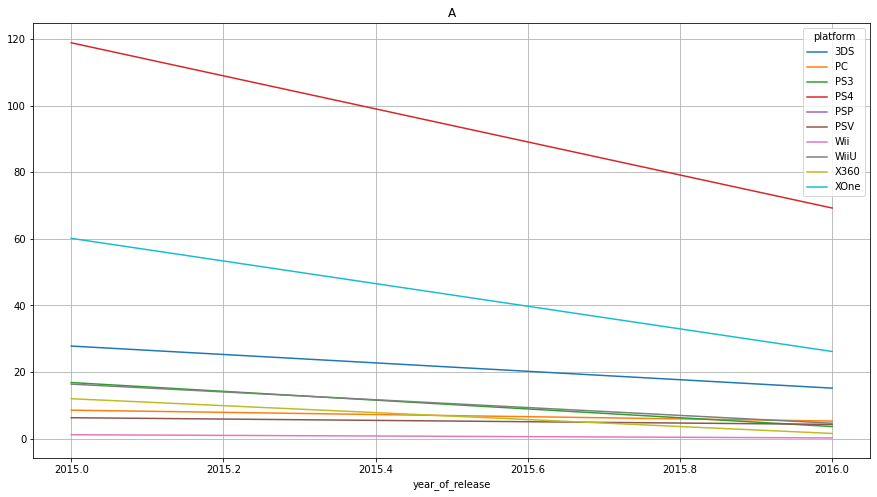

In [39]:
#сгруппируем датафейм по годам для просмотра платформ, которые лидируют по продажам, растут или падают
data_actual.pivot_table(index = 'year_of_release', columns = 'platform', values = 'amount_region', aggfunc = 'sum')\
.plot(title = 'A', figsize=(15,8), grid = True);

**Вывод:** 

По графику мы можем наблюдать о спаде продаж за год почти у всех платформ.

## Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.09,0.2325,7.14
PS4,301.0,0.625083,1.457063,0.01,0.050,0.12,0.4200,14.63
XOne,167.0,0.516707,0.965940,0.01,0.035,0.13,0.5550,7.39


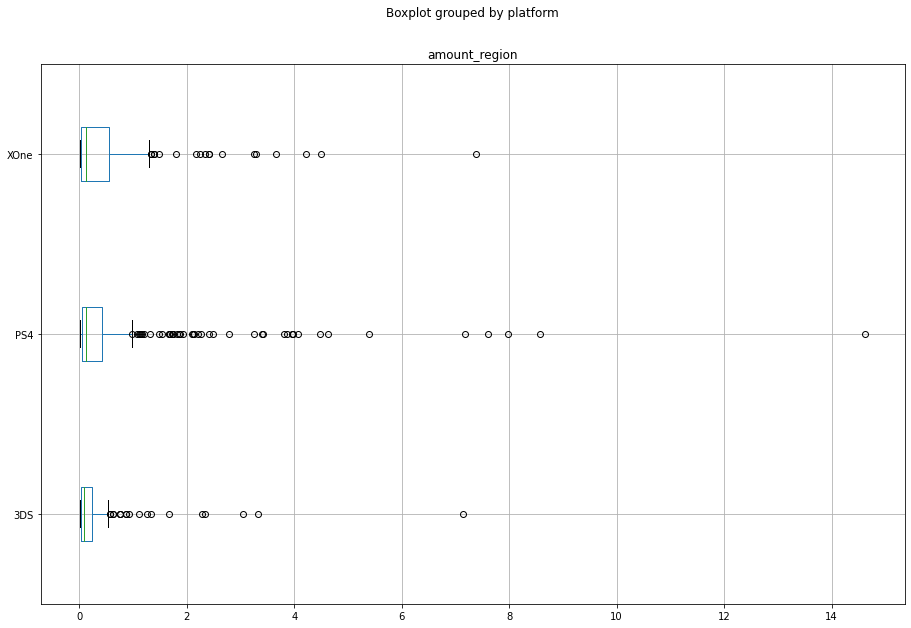

In [84]:
#оставим топ 3 платформ PS4, 3DS, XOne.
data_3top = data_actual.query('platform == ["PS4","3DS","XOne"]')


display(data_3top.groupby('platform')['amount_region'].describe())

#построим диаграмму размаха
data_3top.boxplot(figsize=(15,10),column='amount_region', by='platform',vert=False);
plt.xlabel('')
plt.show();

In [41]:
data_3top.loc[data_3top['amount_region'] > 14] #Call of Duty: Black Ops 3 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,-1,-1.0,no name


Самой покупаемой игрой оказалась "Call of Duty: Black Ops 3".

Исходя из диаграммы размаха можно сделать вывод - то выбросы имеют место быть и их достаточно, на мой взгляд их убирать не стоит, так как есть игры , которые могли стать очень популярными. Лидер по выбросам PS4. Но что касается медиан? наглядно не видно, сделаем чуть крупнее и посмотрим.

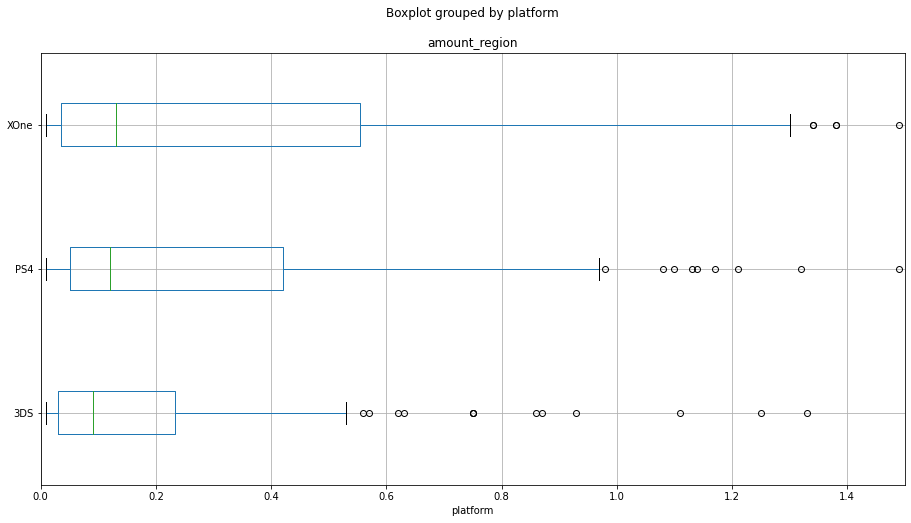

In [42]:
data_3top = data_actual.query('platform == ["PS4","3DS","XOne"]')

data_3top.boxplot(figsize=(15,8), column='amount_region', by='platform', vert=False);
plt.xlim(0, 1.5)
plt.show()

**Вывод:** 

Хоть и PS4 имеет больше выбросов,что говорит о большей популярности, XOne может похвастаться своей стибльностью в плане успешных игр так как медианное значение больше, чем у PS4 и 3DS.

## Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков - PS4

### Зависимость продаж от отзывов пользователей

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score
year_of_release,1.000000,-0.152276,-0.082329,-0.142387,-0.126992,-0.124932,-0.042474,0.016125
na_sales,-0.152276,1.000000,0.615644,0.500853,0.881468,0.849793,0.337184,-0.026921
eu_sales,-0.082329,0.615644,1.000000,0.460083,0.914657,0.937389,0.260775,-0.086974
jp_sales,-0.142387,0.500853,0.460083,1.000000,0.532674,0.560029,0.315100,0.185471
other_sales,-0.126992,0.881468,0.914657,0.532674,1.000000,0.997237,0.330034,-0.065671
amount_region,-0.124932,0.849793,0.937389,0.560029,0.997237,1.000000,0.328367,-0.059738
critic_score,-0.042474,0.337184,0.260775,0.315100,0.330034,0.328367,1.000000,0.352373
user_score,0.016125,-0.026921,-0.086974,0.185471,-0.065671,-0.059738,0.352373,1.000000


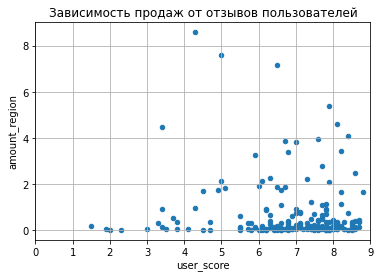

In [43]:
#создадим датафрейм с одним типом платформы
data_ps4_user = data_actual.query('platform == "PS4" & user_score != -1')
#построим корреляцию
display(data_ps4_user.corr())
#посмотрим зависимость
data_ps4_user.plot(title = 'Зависимость продаж от отзывов пользователей',x = 'user_score', y = 'amount_region', xlim=(0,9), kind = 'scatter', grid = True);

### Зависимость продаж от отзывов критиков

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score
year_of_release,1.00,-0.15,-0.08,-0.15,-0.13,-0.13,-0.02,-0.02
na_sales,-0.15,1.00,0.61,0.50,0.88,0.85,0.41,0.01
eu_sales,-0.08,0.61,1.00,0.46,0.91,0.94,0.31,-0.05
jp_sales,-0.15,0.50,0.46,1.00,0.53,0.56,0.37,0.18
other_sales,-0.13,0.88,0.91,0.53,1.00,1.00,0.39,-0.02
amount_region,-0.13,0.85,0.94,0.56,1.00,1.00,0.39,-0.02
critic_score,-0.02,0.41,0.31,0.37,0.39,0.39,1.00,0.46
user_score,-0.02,0.01,-0.05,0.18,-0.02,-0.02,0.46,1.00


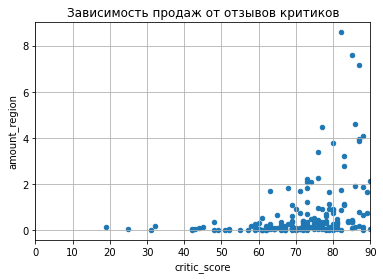

In [86]:
#создадим датафрейм с одним типом платформы
data_ps4_critic = data_actual.query('platform == "PS4" & critic_score != -1')
#построим корреляцию
display(data_ps4_critic.corr().round(2))
#посмотрим зависимость
data_ps4_critic.plot(title = 'Зависимость продаж от отзывов критиков',x = 'critic_score', y = 'amount_region', xlim=(0,90), kind = 'scatter', grid = True);

**Вывод по платформе - PS4**
- Зависимость между величинами оценка пользователя и общими продажами отсутствует (-0.06)
- Зависимость между величинами оценка критика и общими продажами достаточно выражена (0.4)

## Соотнесем выводы с продажами игр на других платформах - XOne, 

### Зависимость продаж от отзывов пользователей

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score
year_of_release,1.000000,-0.274899,-0.164398,-0.235902,-0.277096,-0.262500,-0.043796,0.042503
na_sales,-0.274899,1.000000,0.568948,0.406383,0.976354,0.938035,0.359189,-0.018911
eu_sales,-0.164398,0.568948,1.000000,0.414526,0.730755,0.818643,0.310354,-0.068619
jp_sales,-0.235902,0.406383,0.414526,1.000000,0.441061,0.462400,0.169217,0.100080
other_sales,-0.277096,0.976354,0.730755,0.441061,1.000000,0.989800,0.380934,-0.033664
amount_region,-0.262500,0.938035,0.818643,0.462400,0.989800,1.000000,0.381815,-0.041467
critic_score,-0.043796,0.359189,0.310354,0.169217,0.380934,0.381815,1.000000,0.275021
user_score,0.042503,-0.018911,-0.068619,0.100080,-0.033664,-0.041467,0.275021,1.000000


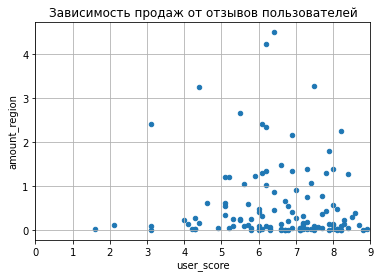

In [45]:
#создадим датафрейм с одним типом платформы
data_XOne_user = data_actual.query('platform == "XOne" & user_score != -1')
#построим корреляцию
display(data_XOne_user.corr())
#посмотрим зависимость
data_XOne_user.plot(title = 'Зависимость продаж от отзывов пользователей',x = 'user_score', y = 'amount_region', xlim=(0,9), kind = 'scatter', grid = True);

### Зависимость продаж от отзывов критиков 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score
year_of_release,1.000000,-0.274848,-0.159089,-0.240370,-0.275568,-0.260988,0.018976,0.047167
na_sales,-0.274848,1.000000,0.557889,0.401310,0.975696,0.936175,0.405857,0.056277
eu_sales,-0.159089,0.557889,1.000000,0.409566,0.723668,0.813988,0.345921,0.002222
jp_sales,-0.240370,0.401310,0.409566,1.000000,0.436622,0.458372,0.206701,0.106450
other_sales,-0.275568,0.975696,0.723668,0.436622,1.000000,0.989479,0.429969,0.047296
amount_region,-0.260988,0.936175,0.813988,0.458372,0.989479,1.000000,0.430889,0.040832
critic_score,0.018976,0.405857,0.345921,0.206701,0.429969,0.430889,1.000000,0.444560
user_score,0.047167,0.056277,0.002222,0.106450,0.047296,0.040832,0.444560,1.000000


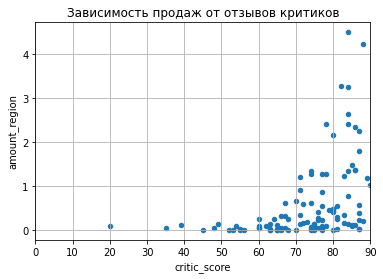

In [46]:
#создадим датафрейм с одним типом платформы
data_XOne_critic = data_actual.query('platform == "XOne" & critic_score != -1')
#построим корреляцию
display(data_XOne_critic.corr())
#посмотрим зависимость
data_XOne_critic.plot(title = 'Зависимость продаж от отзывов критиков',x = 'critic_score', y = 'amount_region', xlim=(0,90), kind = 'scatter', grid = True);

**XOne**
- Зависимость между величинами оценка пользователя и общими продажами отсутствует (-0.04)
- Зависимость между величинами оценка критика и общими продажами не сильно выражена, но все же есть (0.4)

## Соотнесем выводы с продажами игр на других платформах - 3DS, 

### Зависимость продаж от отзывов пользователей

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score
year_of_release,1.000000,-0.287917,-0.219799,-0.167585,-0.285183,-0.248435,-0.084349,-0.107276
na_sales,-0.287917,1.000000,0.766272,0.579709,0.977915,0.862132,0.204420,0.329967
eu_sales,-0.219799,0.766272,1.000000,0.899172,0.876042,0.970442,0.060218,0.111276
jp_sales,-0.167585,0.579709,0.899172,1.000000,0.710151,0.903945,0.199926,0.088339
other_sales,-0.285183,0.977915,0.876042,0.710151,1.000000,0.939839,0.177606,0.281898
amount_region,-0.248435,0.862132,0.970442,0.903945,0.939839,1.000000,0.176479,0.198796
critic_score,-0.084349,0.204420,0.060218,0.199926,0.177606,0.176479,1.000000,0.189173
user_score,-0.107276,0.329967,0.111276,0.088339,0.281898,0.198796,0.189173,1.000000


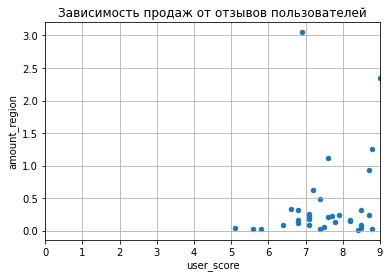

In [47]:
#Проверим зависимость у 3DS
data_3DS_user = data_actual.query('platform == "3DS" & user_score != -1') #["3DS","XOne"]
#построим корреляцию
display(data_3DS_user.corr())
#посмотрим зависимость
data_3DS_user.plot(title = 'Зависимость продаж от отзывов пользователей',x = 'user_score', y = 'amount_region', xlim=(0,9), kind = 'scatter', grid = True);

### Зависимость продаж от отзывов критиков

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,amount_region,critic_score,user_score
year_of_release,1.000000,-0.274848,-0.159089,-0.240370,-0.275568,-0.260988,0.018976,0.047167
na_sales,-0.274848,1.000000,0.557889,0.401310,0.975696,0.936175,0.405857,0.056277
eu_sales,-0.159089,0.557889,1.000000,0.409566,0.723668,0.813988,0.345921,0.002222
jp_sales,-0.240370,0.401310,0.409566,1.000000,0.436622,0.458372,0.206701,0.106450
other_sales,-0.275568,0.975696,0.723668,0.436622,1.000000,0.989479,0.429969,0.047296
amount_region,-0.260988,0.936175,0.813988,0.458372,0.989479,1.000000,0.430889,0.040832
critic_score,0.018976,0.405857,0.345921,0.206701,0.429969,0.430889,1.000000,0.444560
user_score,0.047167,0.056277,0.002222,0.106450,0.047296,0.040832,0.444560,1.000000


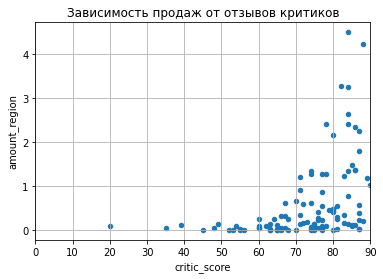

In [48]:
#создадим датафрейм с одним типом платформы
data_3DS_critic = data_actual.query('platform == "XOne" & critic_score != -1')
#построим корреляцию
display(data_3DS_critic.corr())
#посмотрим зависимость
data_3DS_critic.plot(title = 'Зависимость продаж от отзывов критиков',x = 'critic_score', y = 'amount_region', xlim=(0,90), kind = 'scatter', grid = True);

**3DS**
- Зависимость между величинами оценка пользователя и общими продажами отсутствует (0.3)
- Зависимость между величинами оценка критика и общими продажами отсутствует (0.4)

**Вывод:**

* PS4 в большей стпени зависит от оценки критиков (0.4), чем от оценки пользователей (-0.06) 
* XOne в большей стпени зависит от оценки критиков (0.4), чем от оценки пользователей (-0.04)
* 3DS в большей стпени зависит от оценки критиков (0.4), чем от оценки пользователей (0.3)

Корреляция по платформам PS4 и XOne почти одинаковая.У платформы 3DS нет зависимости от величин.

## Распределение игр по жанрам

In [49]:
#сгруппируем актульный датафрейм по жанру
data_genre = data_actual.pivot_table(index = 'genre', values = 'name', aggfunc= 'count')\
.sort_values(by = 'name', ascending = False)
data_genre

,name
genre,
Action,431
Role-Playing,132
Adventure,110
Sports,107
Shooter,81
Misc,71
Racing,42
Fighting,37
Simulation,33


Вывод: мы наблюдаем, что самой большой популярностью (если рассматривать с позиции - спрос рождает предложение) пользуются игры с жанром 
- `Action` экшн (жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока) - 431.
- `Role-Playing` игра развлекательного назначения, в которой участник берет какую-то определенную роль и в воображаемой ситуации действует соответственно этой роли - 132.
- `Adventure` приключения - 110.
- `Sports` спорт - 107.

### Прибыльность жанров

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Adventure,110.0,0.108909,0.254260,0.01,0.0200,0.030,0.060,1.66
Puzzle,7.0,0.102857,0.170070,0.01,0.0150,0.030,0.085,0.48
Strategy,29.0,0.102759,0.115539,0.01,0.0200,0.050,0.140,0.52
Racing,42.0,0.258571,0.497342,0.01,0.0300,0.055,0.215,2.42
Misc,71.0,0.199577,0.286718,0.01,0.0300,0.060,0.290,1.58
Action,431.0,0.236961,0.525858,0.01,0.0200,0.060,0.190,4.62
Fighting,37.0,0.334324,0.549695,0.01,0.0400,0.090,0.330,2.78
Platform,28.0,0.331429,0.667387,0.01,0.0575,0.100,0.220,3.21
Simulation,33.0,0.228788,0.531018,0.01,0.0200,0.100,0.220,3.05


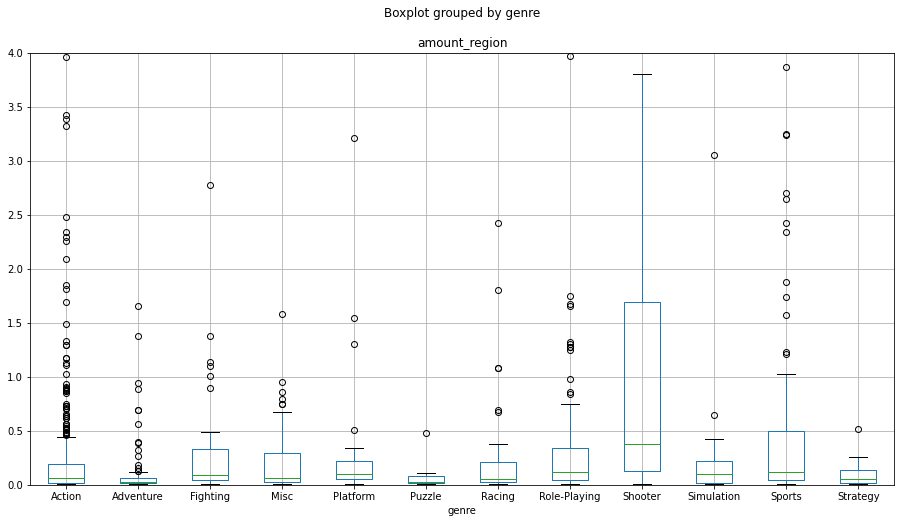

In [50]:
#посмотрим на стат. показатели
display(data_actual.groupby('genre')['amount_region'].describe().sort_values(by='50%'))
#построи даграммы размаха для жанров
data_actual.boxplot(column='amount_region', by='genre', figsize=(15,8));
plt.ylim(0,4 )
plt.show()

**Вывод:**

о прибыльности жанров, можно сообщить следующее:
- Самым окупаемым жанром (с позиции - спрос рождает предложение) является - Shooter.
- Второе место занимает Sports экшен. 
- Третье место Role - Playing.

Следующие позици почти упали вдвое. 
Как следствие можно судить, что два жанра Shooter и Sports выделяются и стабильно приносят больше прибыли, чем остальные.

---

# Шаг 4. Портрет пользователя каждого региона

## Самые популярные платформы и жанры в Северной Америке.

<div align="center"><b> жанры </b></div> 

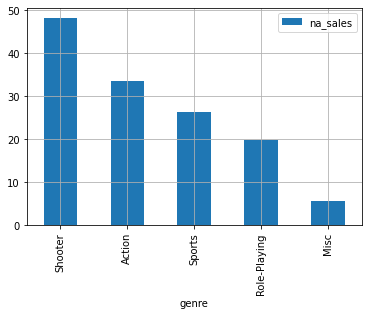

In [51]:
#посторим столбчатую диаграмму
data_actual.pivot_table(index= 'genre', values = 'na_sales', aggfunc= 'sum')\
.sort_values(by='na_sales', ascending = False)\
.head(5)\
.plot(kind = 'bar', grid = True);

<div align="center"><b> доля продаж от жанров</b></div> 

In [52]:
na_sales_genre = data_actual.groupby('genre')['na_sales'].sum()

#сгруппируем данные полной таблицы и поделим ее на данные актуальной таблицы 
full_genre = data_actual.groupby('genre')['amount_region'].sum() #.sort_values(ascending=False)
#вычислим процентное соотношение
share_genreNA = na_sales_genre / full_genre * 100

share_genreNA.sort_values(ascending=False)

genre
Shooter         45.568902
Fighting        44.785772
Sports          40.898492
Platform        40.732759
Misc            39.378970
Role-Playing    35.506987
Action          32.977578
Adventure       32.053422
Strategy        27.516779
Racing          25.966851
Simulation      18.013245
Puzzle           8.333333
dtype: float64

Вывод: в данном случае, мы видим , что в Северной Америке прогрессируют жанры 
- Шутер (48), 
- Экшн (33) , 
- Спорт (26),
- Role-Playing (19),
- Misc (5)

<div align="center"><b> платформы </b></div> 

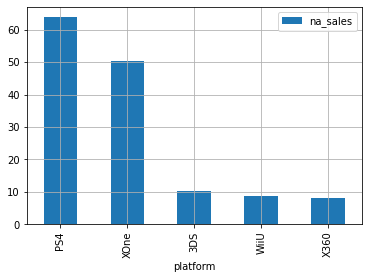

In [53]:
#посторим столбчатую диаграмму
data_actual.pivot_table(index= 'platform', values = 'na_sales', aggfunc= 'sum')\
.sort_values(by='na_sales', ascending = False)\
.head(5)\
.plot(kind = 'bar', grid = True);

<div align="center"><b> доля продаж от платформ</b></div> 

In [54]:
na_sales_platform = data_actual.groupby('platform')['na_sales'].sum()

#сгруппируем данные полной таблицы и поделим ее на данные актуальной таблицы 
full_platform = data_actual.groupby('platform')['amount_region'].sum() #.sort_values(ascending=False)
#вычислим процентное соотношение
share_platformNA = na_sales_platform / full_platform * 100

share_platformNA.sort_values(ascending=False)

platform
X360    59.718101
XOne    58.291807
WiiU    42.291169
Wii     37.121212
PS4     33.941005
PS3     27.717924
PC      27.015251
3DS     24.021435
PSV      5.142857
PSP      0.000000
dtype: float64

Вывод: в данном случае, мы видим , что в Северной Америке прогрессируют платформы:
- PS4 (63), 
- XOne (50) , 
- 3DS (10),
- WiiU (8),
- X360 (8)

## Самые популярные платформы и жанры в Европе.

<div align="center"><b> жанры </b></div> 

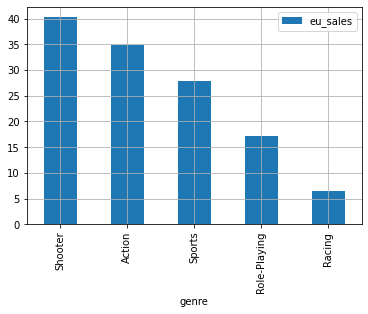

In [55]:
data_actual.pivot_table(index= 'genre', values = 'eu_sales', aggfunc= 'sum')\
.sort_values(by='eu_sales', ascending = False)\
.head(5)\
.plot(kind = 'bar', grid = True);

<div align="center"><b> доля продаж от жанров</b></div> 

In [56]:
eu_sales_genre = data_actual.groupby('genre')['eu_sales'].sum()

#сгруппируем данные полной таблицы и поделим ее на данные актуальной таблицы 
full_genre = data_actual.groupby('genre')['amount_region'].sum()
#вычислим процентное соотношение
share_genreEU = eu_sales_genre / full_genre * 100

share_genreEU

genre
Action          34.093802
Adventure       38.981636
Fighting        30.072757
Misc            30.063514
Platform        34.482759
Puzzle          18.055556
Racing          60.036832
Role-Playing    30.831243
Shooter         38.097040
Simulation      49.536424
Sports          43.245764
Strategy        52.684564
dtype: float64

Вывод: в данном случае, мы видим , что в Северной Америке прогрессируют жанры 
- Шутер (40), 
- Экшн (34) , 
- Спорт (27),
- Role-Playing (17),
- Racing (6)

<div align="center"><b> платформы </b></div> 

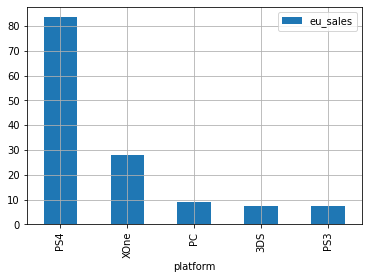

In [57]:
data_actual.pivot_table(index= 'platform', values = 'eu_sales', aggfunc= 'sum')\
.sort_values(by='eu_sales', ascending = False)\
.head(5)\
.plot(kind = 'bar', grid = True);

<div align="center"><b> доля продаж от платформ</b></div> 

In [58]:
eu_sales_platform = data_actual.groupby('platform')['eu_sales'].sum()

#сгруппируем данные полной таблицы и поделим ее на данные актуальной таблицы 
full_platform = data_actual.groupby('platform')['amount_region'].sum() #.sort_values(ascending=False)
#вычислим процентное соотношение
share_platformEU = eu_sales_platform / full_platform * 100

share_platformEU.sort_values(ascending=False)

platform
PC      66.085694
Wii     55.303030
PS4     44.400744
PS3     35.749265
XOne    32.564608
X360    31.231454
WiiU    30.978520
3DS     17.218080
PSV     10.285714
PSP      0.000000
dtype: float64

Вывод: в данном случае, мы видим , что в Северной Америке прогрессируют платформы:
- PS4 (83), 
- XOne (28) , 
- PC (9),
- 3DS (7),
- PS3 (7)

## Самые популярные платформы и жанры в Японии.

<div align="center"><b> жанры </b></div> 

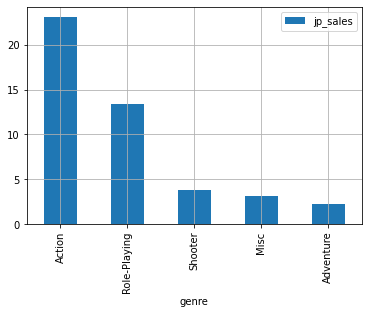

In [59]:
data_actual.pivot_table(index= 'genre', values = 'jp_sales', aggfunc= 'sum')\
.sort_values(by='jp_sales', ascending = False)\
.head(5)\
.plot(kind = 'bar', grid = True);

<div align="center"><b> доля продаж от жанров</b></div> 

In [60]:
jp_sales_genre = data_actual.groupby('genre')['jp_sales'].sum()
#сгруппируем данные полной таблицы и поделим ее на данные актуальной таблицы 
full_genre = data_actual.groupby('genre')['amount_region'].sum()
#вычислим процентное соотношение
share_genreJP = jp_sales_genre / full_genre * 100

share_genreJP

genre
Action          22.569274
Adventure       18.530885
Fighting        12.449475
Misc            22.512350
Platform        15.301724
Puzzle          72.222222
Racing           2.670350
Role-Playing    24.023647
Shooter          3.584602
Simulation      25.562914
Sports           2.564900
Strategy        13.087248
dtype: float64

Вывод: в данном случае, мы видим , что в Северной Америке прогрессируют жанры 
- Экшн (23), 
- Role-Playing (13) , 
- Шутер (3),
- Misc (3),
- Adventure (2)

<div align="center"><b> платформы </b></div> 

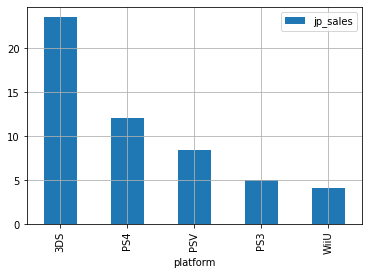

In [61]:
data_actual.pivot_table(index= 'platform', values = 'jp_sales', aggfunc= 'sum')\
.sort_values(by='jp_sales', ascending = False)\
.head(5)\
.plot(kind = 'bar', grid = True);

<div align="center"><b> доля продаж от платформ</b></div> 

In [62]:
jp_sales_platform = data_actual.groupby('platform')['jp_sales'].sum()

#сгруппируем данные полной таблицы и поделим ее на данные актуальной таблицы 
full_platform = data_actual.groupby('platform')['amount_region'].sum() #.sort_values(ascending=False)
#вычислим процентное соотношение
share_platformJP = jp_sales_platform / full_platform * 100

share_platformJP.sort_values(ascending=False)

platform
PSP     100.000000
PSV      80.095238
3DS      54.869525
PS3      24.338883
WiiU     19.665871
PS4       6.404465
XOne      0.208599
PC        0.000000
Wii       0.000000
X360      0.000000
dtype: float64

Вывод: в данном случае, мы видим , что в Северной Америке прогрессируют платформы:
- 3DS (23),
- PS4 (12), 
- PSV (8) , 
- PS3 (4),
- WiiU (2)

## Влияет ли рейтинг ESRB на продажи в отдельном регионе

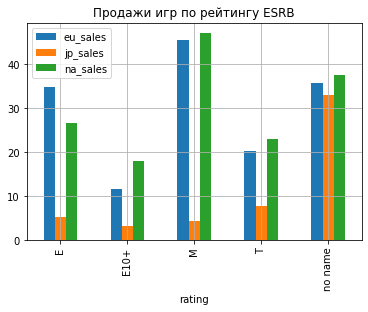

In [63]:
#Построим график с показателями продаж по регионам в зависимости от рейтинга  
data_actual.pivot_table(index = 'rating', values= ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')\
.plot(kind ='bar', title = 'Продажи игр по рейтингу ESRB', grid = True);

**Вывод:**
- E - для всех - В Японии (5.2) данный показатель рейтинга пользуется меньшей популярностью, чем в Северной Америке (26.5), а тем более Европе (34.8). 
- E10+ - для всех от 10 лет и старше - В Северной Америке (17.8) данный показатель рейтинга пользуется большой популярностью, Европе (11.5) и Японии (4.2).
- T — «Подросткам»: Игра подходит для лиц от 13 лет, В Северной Америке (22.8) данный показатель рейтинга пользуется большой популярностью, Европе (20.3) и Японии (7.7).
- M — «Для взрослых», В Северной Америке (47) данный показатель рейтинга пользуется большой популярностью, Европе (45.5) и Японии (4.2).

Что касается Японии, почему такое большое количество игр с неопределенным жанром? почему количество игр с неопределенным жанром в целом такое большое? Я рискну предположить, что для японского рынка видеоигр используют другую систему оценок - (СERO) Computer Entertainment Rating Organization , как может и использовать компанию при выходе на определенный рынок. В нашем датасете есть система оценок только от ESRB Entertainment Software Rating Board (ESRB).  

---

# Шаг 5. Проверка гипотезы

## Гипотеза № 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые за актуальный период.

- Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [64]:
# гипотеза о равенстве средних двух совокупностей (независимых)
PC_1 = data_actual.loc[(data['platform'] == 'PC') & (data['user_score'] != -1)]
XOne_1 = data_actual.loc[(data['platform'] == 'XOne') & (data['user_score'] != -1)] #_actual

alpha = .05

#т.к. выборки разного размера призовем параметр equal_var
results = st.ttest_ind(PC_1['user_score'], XOne_1['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


## Гипотеза № 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные за актуальный период.

- Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [65]:
# гипотеза о равенстве средних двух совокупностей (независимых)
Action_2 = data_actual.loc[(data['genre'] == 'Action') & (data['user_score'] != -1)]
Sports_2 = data_actual.loc[(data['genre'] == 'Sports') & (data['user_score'] != -1)] 

alpha = .05

#т.к. выборки разного размера призовем параметр equal_var
results = st.ttest_ind(Action_2['user_score'], Sports_2['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


**Вывод:**

Исходя их проверки двух гипотез, выдвенем утверждения: 
- Гипотеза №1. В данном случае нулевая гипотеза является верной (т.е. cредние пользовательские рейтинги платформ Xbox One и PC одинаковые).
- Гипотеза №2. В данном случае нулевая гипотеза является  неверной (т.е. средние пользовательские рейтинги платформ Xbox One и PC разные).

---

# Шаг 6.Общий вывод

В первом шаге. Мы открыли таблицу и познакомились с данными,  мы имеем 16 715 строк и 11 столбцов, следом определили, что типа данных всего 2: `object ` и `float`. 

В `45%` столбцах есть пропущенные значения.
<blockquote><ol>   
<li>`Critic_Score` имеет больше `51%` пропусков - больше половины. </li>
<li>`User_Score` и `Rating` имеют по `40%` пропусков.</li>
</ol>
</blockquote>

Следующий шаг - подготовка данных. Первым делом мы изменили наименование столбцов на нижний регистр. Следом изменили тип данных в столбцах.

Изменению подверглись: 
* user_score тип `object` заменен на `float`
* critic_score заменен на `int`
* year_of_release тип `float` заменен на `Int`

Мы пытались найти дубликаты, но их не было. 
И мы приступили к пропускам. 

- столбец `name` (2 пропуска удалены);
- столбец `year_of_release` (269 пропусков удалены);
- столбец `genre` (2 пропуска удалены);
- столбец `user_score` (пустые значения заменены на заглушку -1);
- столбец `critic_score` (пустые значения заменены на заглушку -1);
- столбец `rating` (пустые значения заменены на 'no name')

Далее мы создали столбец с суммой продаж по регионам "amount_region". 

Третий шаг - исследовательский анализ данных. Мы посторили график "Распределние игр по годам" и определили, что больше всего игр было выпущено в `2008 г.` Посмотрели изменение продаж по платформам и выявили , что больше всего игр продали на платформу `PS2`. Также мы определили актуальный период (для прогнозирования) `с 2013 по 2016г.` 

Из актуального периода можно определить, что топ по количеству проданных игр занимает 3 платформы:

- PS4 (188 млн. покупок), 
- XOne(86 млн. покупок), 
- 3DS (42 млн. покупок).

Определили победителя, платформу, по которой приобрели больше всего игр за актуальный период - `PS4.` Хоть и PS4 имеет больше выбросов,что говорит о большей популярности, XOne может похвастаться своей стибльностью в плане успешных игр. 

Проверили влияние на продажи оценки пользователей и критиков внутри одной популярной платформы PS4 и выявили, что оценка пользователей не влияет на продажи , а оценка критика влияет - чем больше оценка критика, тем выше цена. В платформе 3DS  как оценка киртиков так и пользователей прямо влияют на количество продаж.

Сделали распеределение по жанрам и жанр - "Action", оказался с самым большим по количесту игр. Менее - "Puzzle".
Следом посмотрели на прибыльность жанров, самый прибыльный - `Shooter`, менее прибыльный `Puzzle`и `Stranegy`. 

В 4 шаге, мы рассматривали популярность платаформ:

* В Северной Америке
    * PS4 (63),
    * XOne (50),
    * 3DS (10),
    * WiiU (8),
    * X360 (8)
* В Европе
    * PS4 (83),
    * XOne (28),
    * PC (9),
    * 3DS (7),
    * PS3 (7)
* В Японии
    * 3DS (23),
    * PS4 (12),
    * PSV (8),
    * PS3 (4),
    * WiiU (2) 

Популярность жанров:

* В Северной Америке
     * Шутер (48),
     * Экшн (33) ,
     * Спорт (26),
     * Role-Playing (19),
     * Misc (5)
* В Европе
     * Шутер (40),
     * Экшн (34) ,
     * Спорт (27),
     * Role-Playing (17),
     * Racing (6)
* В Японии
    * Экшн (23),
    * Role-Playing (13) ,
    * Шутер (3),
    * Misc (3),
    * Adventure (2)

Посчитали влияние ESRB (возрастной рейтинг) на продажи. Самым популярным рейтингом можно считать М - для взрослых. И определили, что столбец 'no name' оценка неопределена относится к играм, которым проставляла оценку другая организация, например в Японии, оценкой игр занимается - СERO.

В 5 шаге проверили две гипотезы. 
<blockquote><ol>   
<li>Гипотеза № 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые за весь период. - ПОДТВЕРДИЛАСЬ </li>
<li>Гипотеза № 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные за весь период. - ПОДТВЕРДИЛАСЬ</li>
</ol>
</blockquote>

**Прогноз на 2017: основной упор во всех регионах можно делать на платформу PS4 она самая популярная, а для Японии 3DS. По жанрам - Шутер и Экшн, для Японии еще Role-Playing. Наибольшей популярность пользуется рейтинг М - для взрослых, в Японии Т - тинейджеры.**
